In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.datasets import mnist

sns.set()
sns.set_style('white')

In [93]:
# load mnist of handwritten digits data
(x_train, y_train),_ = mnist.load_data()

x_train = np.reshape(x_train,(60000,28*28))
x_train = x_train/255.0

n_sample = 500
n_feature = 784
x_train = x_train[:n_sample,:]
y_train = y_train[:n_sample]

In [120]:
# softmax regression
tf.reset_default_graph()

x = tf.placeholder(shape=(None,n_feature),dtype=tf.float32)
y = tf.placeholder(shape=(None,),dtype=tf.int32)

w = tf.get_variable('w',shape=(n_feature,10),dtype=tf.float32,initializer=tf.contrib.layers.xavier_initializer())
b = tf.get_variable('b',shape=(1,10),dtype=tf.float32,initializer=tf.zeros_initializer())
z = tf.matmul(x,w) + b

a = tf.nn.softmax(z,axis=1)
y_pred = tf.argmax(a,axis=1,output_type=tf.int32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(y_pred,y),tf.float32))

cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=z,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.02).minimize(cost)

### Batch Gradient Gescent

Cost after epoch 0 = 2.4006, accuracy = 0.5540
Cost after epoch 5 = 0.4875, accuracy = 0.8920
Cost after epoch 10 = 0.2856, accuracy = 0.9240
Cost after epoch 15 = 0.1818, accuracy = 0.9660
Cost after epoch 20 = 0.1260, accuracy = 0.9720


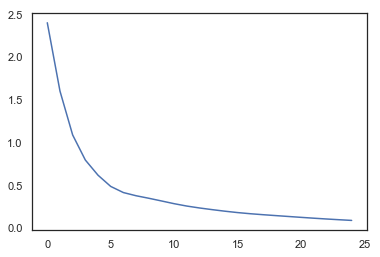

In [122]:
print_cost = True
epoch_num = 25
cost_vec = np.zeros(epoch_num)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(epoch_num):
        _,cost_val = sess.run([optimizer,cost],feed_dict={x:x_train,y:y_train})
        cost_vec[i] = cost_val
        if print_cost == True and i % 5 == 0:
            accuracy_val = sess.run(accuracy,feed_dict={x:x_train, y:y_train})
            print ("Cost after epoch %d = %.4f, accuracy = %.4f" % (i,cost_val,accuracy_val))

plt.figure(figsize=(6,4))
plt.plot(cost_vec)
plt.show()

### Stochastic Gradient Descent

Cost after epoch 0 = 0.8835, accuracy = 0.8280
Cost after epoch 1 = 0.2767, accuracy = 0.9220
Cost after epoch 2 = 0.4409, accuracy = 0.9260
Cost after epoch 3 = 0.0935, accuracy = 0.9780
Cost after epoch 4 = 0.1199, accuracy = 0.9640


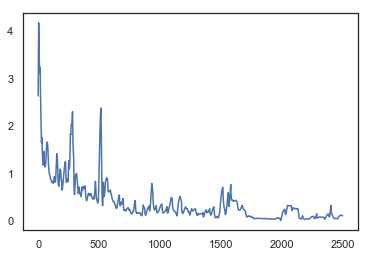

In [123]:
print_cost = True
epoch_num = 5
cost_vec = np.zeros(epoch_num*n_sample)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    k = 0
    for i in range(epoch_num):
        for j in range(n_sample):
            sess.run(optimizer,feed_dict={x:x_train[[j],:],y:y_train[[j]]})
            cost_val = sess.run(cost,feed_dict={x:x_train,y:y_train})
            cost_vec[k] = cost_val
            
            k += 1
        if print_cost == True and i % 1 == 0:
            accuracy_val = sess.run(accuracy,feed_dict={x:x_train, y:y_train})
            print ("Cost after epoch %d = %.4f, accuracy = %.4f" % (i,cost_val,accuracy_val))

plt.figure(figsize=(6,4))
plt.plot(cost_vec)
plt.show()

### Mini-batch Gradient Descend

In [108]:
batch_size = 32
batch_num = np.int32(n_sample/batch_size + 1)
print('batch num = %d' % batch_num)

batch_indices = []
for i in range(batch_num-1):
    batch_indices.append(np.arange(batch_size*i,batch_size*(i+1)))
batch_indices.append(np.arange(batch_size*i,n_sample))

batch num = 16


Cost after epoch 0 = 0.3871, accuracy = 0.8840
Cost after epoch 1 = 0.2325, accuracy = 0.9280
Cost after epoch 2 = 0.1079, accuracy = 0.9780
Cost after epoch 3 = 0.0586, accuracy = 1.0000
Cost after epoch 4 = 0.0413, accuracy = 1.0000


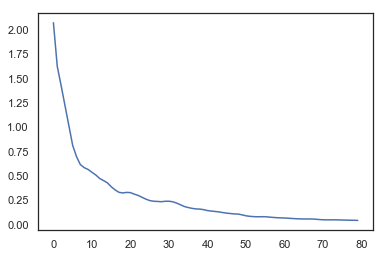

In [125]:
print_cost = True
epoch_num = 5
cost_vec = np.zeros(epoch_num*batch_num)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    k = 0
    for i in range(epoch_num):
        for batch_index in batch_indices:
            sess.run(optimizer,feed_dict={x:x_train[batch_index,:],y:y_train[batch_index]})
            cost_val = sess.run(cost,feed_dict={x:x_train,y:y_train})
            cost_vec[k] = cost_val
            
            k += 1
        if print_cost == True and i % 1 == 0:
            accuracy_val = sess.run(accuracy,feed_dict={x:x_train, y:y_train})
            print ("Cost after epoch %d = %.4f, accuracy = %.4f" % (i,cost_val,accuracy_val))

plt.figure(figsize=(6,4))
plt.plot(cost_vec)
plt.show()